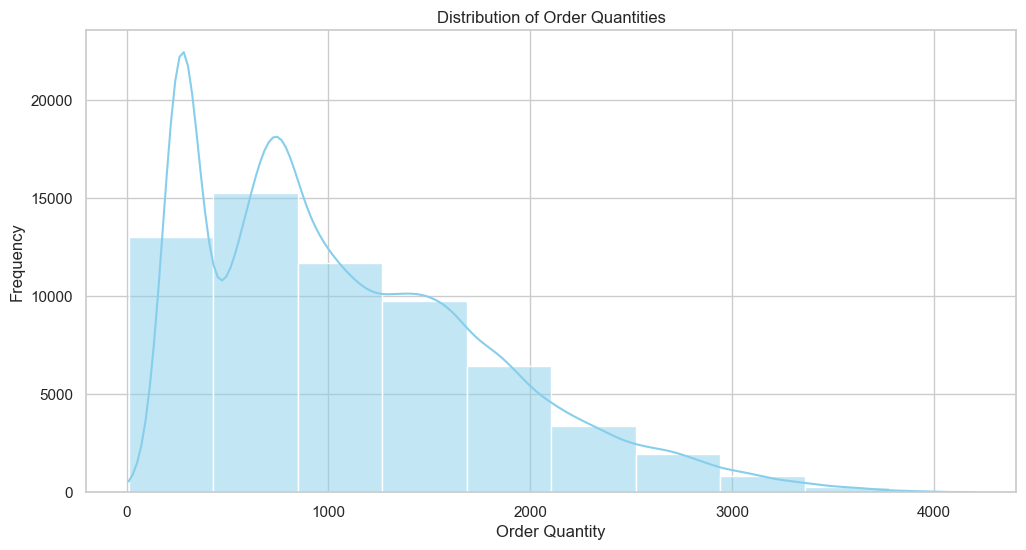

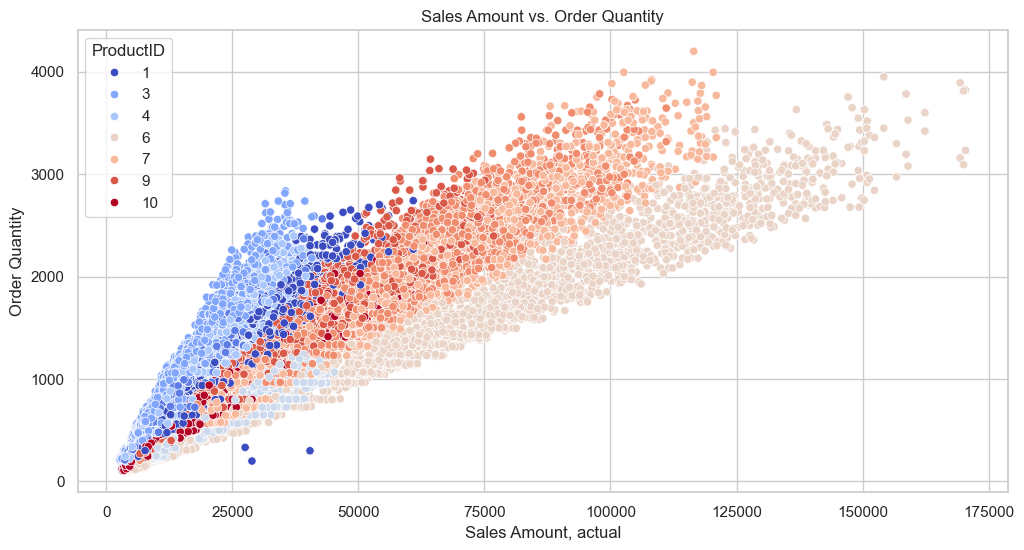

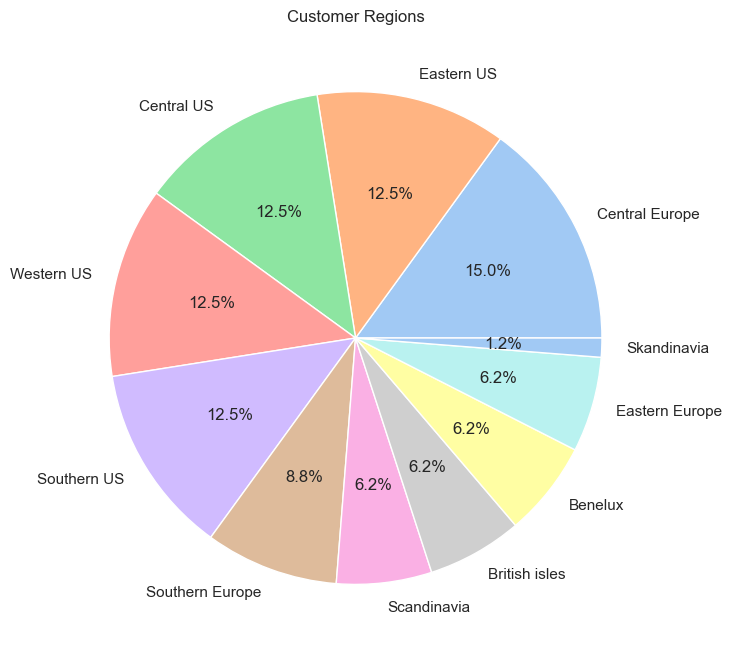

C:\Users\perumalm\AppData\Local\Temp\ipykernel_14688\2498308810.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ProductGroup', data=df_product, palette='muted')


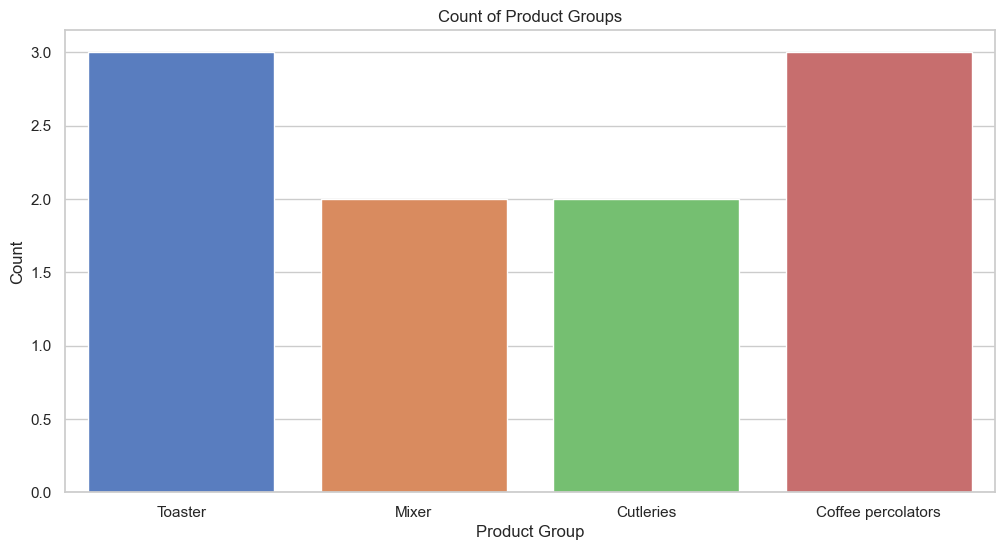

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

file_path = r'C:\Users\perumalm\Desktop\GIT\MySQL server\GitHub_Copliot_demo\Excelfiles\Git_copilot_POC_3.xlsx'

# Read the sheets from the Excel file
df_customer = pd.read_excel(file_path, sheet_name='DimCustomer')
df_product = pd.read_excel(file_path, sheet_name='DimProduct')
df_finance = pd.read_excel(file_path, sheet_name='FactFinance')
df_address = pd.read_excel(file_path, sheet_name='DimAddress')

# Set the style
sns.set(style="whitegrid")

# 1. Histogram for OrderQuantity
plt.figure(figsize=(12, 6))
sns.histplot(df_finance['OrderQuantity'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Order Quantities')
plt.xlabel('Order Quantity')
plt.ylabel('Frequency')
plt.show()



# 4. Scatter plot for Sales Amount, actual vs. OrderQuantity
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Sales Amount, actual', y='OrderQuantity', data=df_finance, hue='ProductID', palette='coolwarm')
plt.title('Sales Amount vs. Order Quantity')
plt.xlabel('Sales Amount, actual')
plt.ylabel('Order Quantity')
plt.show()

# 5. Pie chart for Customer Regions
plt.figure(figsize=(8, 8))
df_customer['Region'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Customer Regions')
plt.ylabel('')
plt.show()



# 8. Count plot for Product Groups
plt.figure(figsize=(12, 6))
sns.countplot(x='ProductGroup', data=df_product, palette='muted')
plt.title('Count of Product Groups')
plt.xlabel('Product Group')
plt.ylabel('Count')
plt.show()



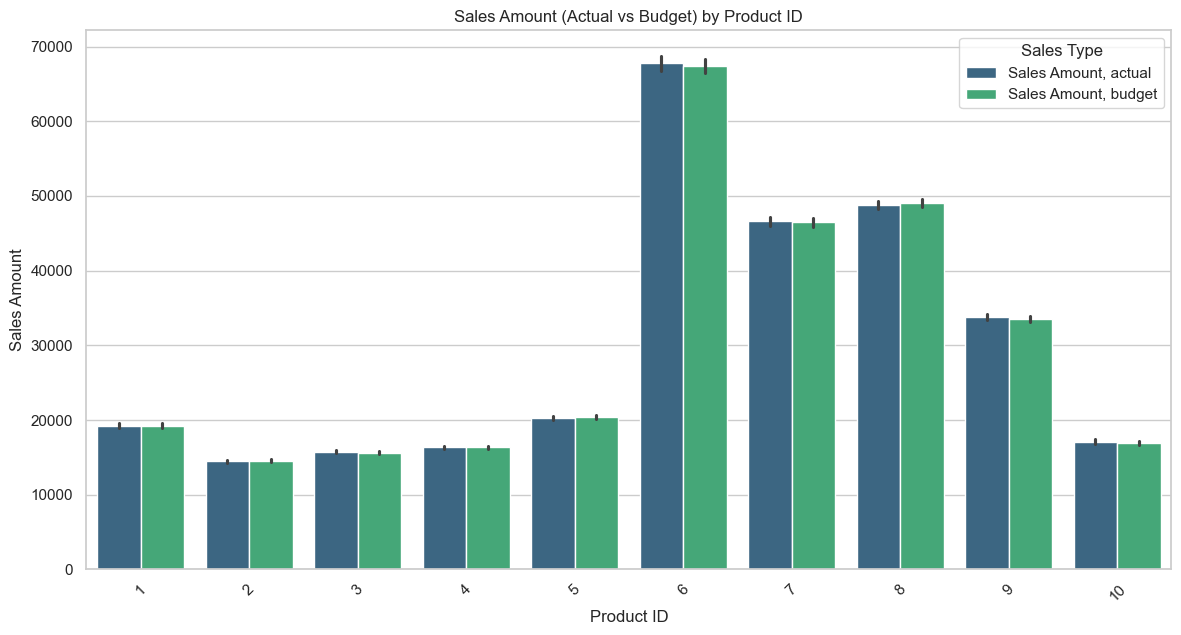

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

file_path = r'C:\Users\perumalm\Desktop\GIT\MySQL server\GitHub_Copliot_demo\Excelfiles\Git_copilot_POC_3.xlsx'

# Read the sheets from the Excel file
df_finance = pd.read_excel(file_path, sheet_name='FactFinance')

# Set the style
sns.set(style="whitegrid")

# Create a bar plot for 'Sales Amount, actual' and 'Sales Amount, budget' vs 'ProductID'
plt.figure(figsize=(14, 7))
df_finance_melted = df_finance.melt(id_vars='ProductID', value_vars=['Sales Amount, actual', 'Sales Amount, budget'],
                                    var_name='Sales Type', value_name='Sales Amount')

sns.barplot(x='ProductID', y='Sales Amount', hue='Sales Type', data=df_finance_melted, palette='viridis')
plt.title('Sales Amount (Actual vs Budget) by Product ID')
plt.xlabel('Product ID')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.legend(title='Sales Type')
plt.show()

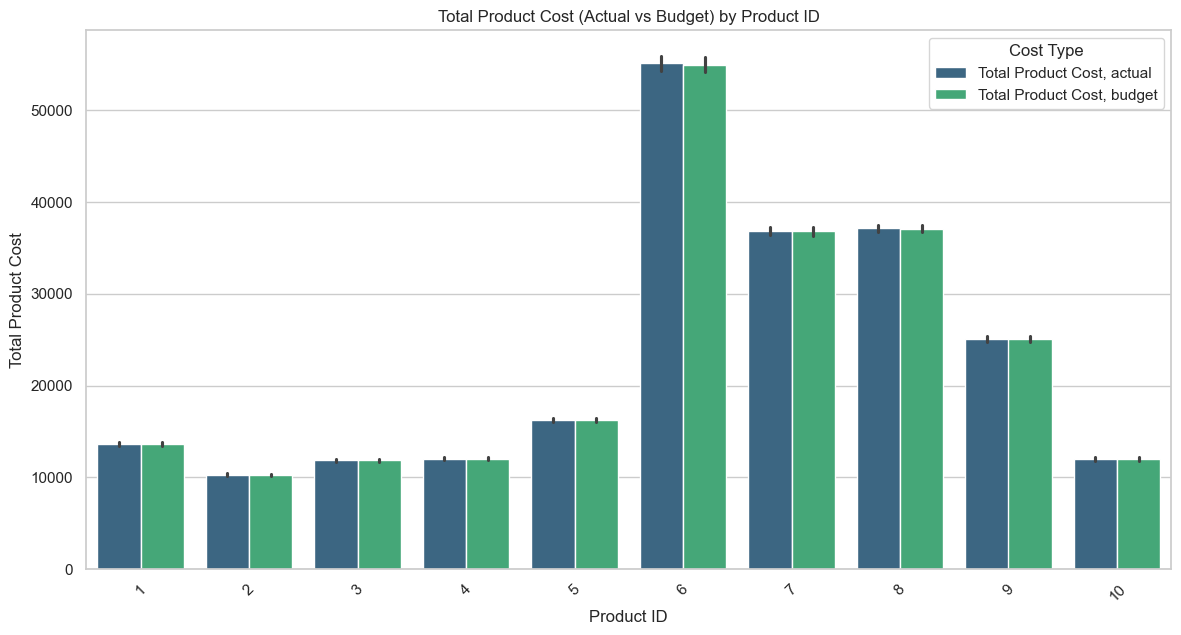

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

file_path = r'C:\Users\perumalm\Desktop\GIT\MySQL server\GitHub_Copliot_demo\Excelfiles\Git_copilot_POC_3.xlsx'

# Read the sheets from the Excel file
df_finance = pd.read_excel(file_path, sheet_name='FactFinance')

# Set the style
sns.set(style="whitegrid")

# Create a bar plot for 'Total Product Cost, actual' and 'Total Product Cost, budget' vs 'ProductID'
plt.figure(figsize=(14, 7))
df_finance_melted = df_finance.melt(id_vars='ProductID', value_vars=['Total Product Cost, actual', 'Total Product Cost, budget'],
                                    var_name='Cost Type', value_name='Total Product Cost')

sns.barplot(x='ProductID', y='Total Product Cost', hue='Cost Type', data=df_finance_melted, palette='viridis')
plt.title('Total Product Cost (Actual vs Budget) by Product ID')
plt.xlabel('Product ID')
plt.ylabel('Total Product Cost')
plt.xticks(rotation=45)
plt.legend(title='Cost Type')
plt.show()

C:\Users\perumalm\AppData\Local\Temp\ipykernel_14688\3868478547.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer', y='Sales Amount, actual', data=top_5_customers, palette='viridis')


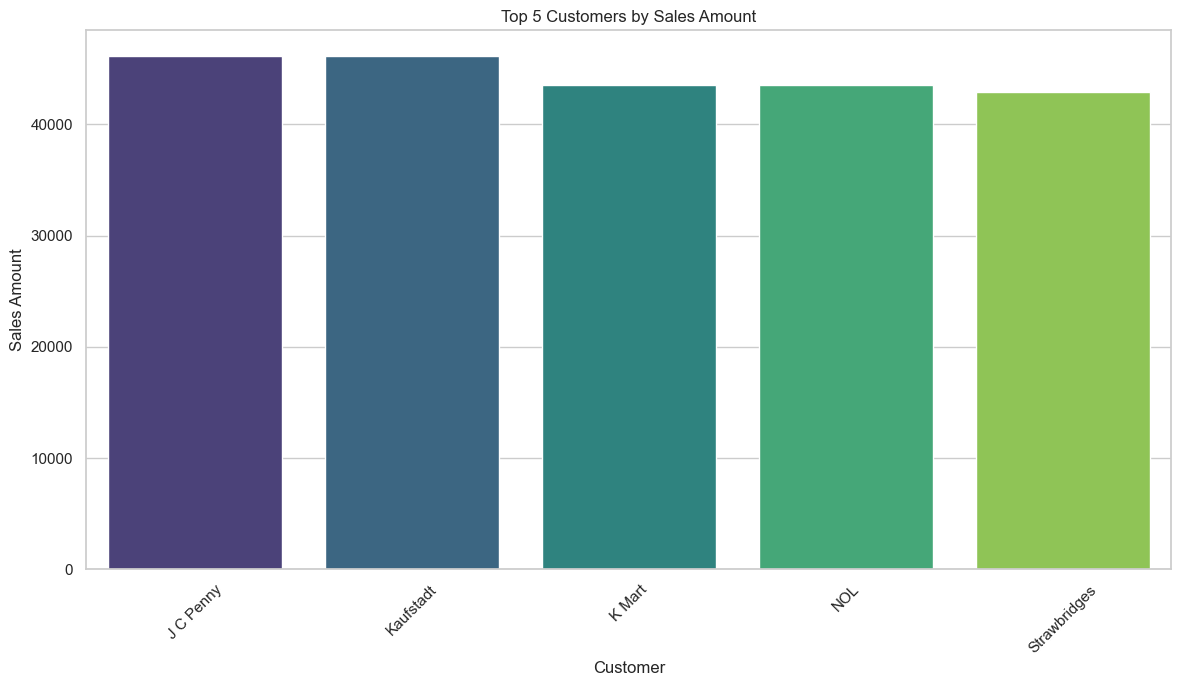

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

file_path = r'C:\Users\perumalm\Desktop\GIT\MySQL server\GitHub_Copliot_demo\Excelfiles\Git_copilot_POC_3.xlsx'

# Read the sheets from the Excel file
df_finance = pd.read_excel(file_path, sheet_name='FactFinance')
df_customer = pd.read_excel(file_path, sheet_name='DimCustomer')

# Aggregate sales amount by customer
customer_sales = df_finance.groupby('CustomerID')['Sales Amount, actual'].sum().reset_index()

# Convert sales amount to thousands
customer_sales['Sales Amount, actual'] = customer_sales['Sales Amount, actual'] / 1000

# Merge with customer data to get customer names
customer_sales = customer_sales.merge(df_customer[['CustomerID', 'Customer']], on='CustomerID')

# Get the top 5 customers by sales amount
top_5_customers = customer_sales.nlargest(5, 'Sales Amount, actual')

# Set the style
sns.set(style="whitegrid")

# Create a bar plot for top 5 customers by sales amount
plt.figure(figsize=(14, 7))
sns.barplot(x='Customer', y='Sales Amount, actual', data=top_5_customers, palette='viridis')
plt.title('Top 5 Customers by Sales Amount')
plt.xlabel('Customer')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.show()

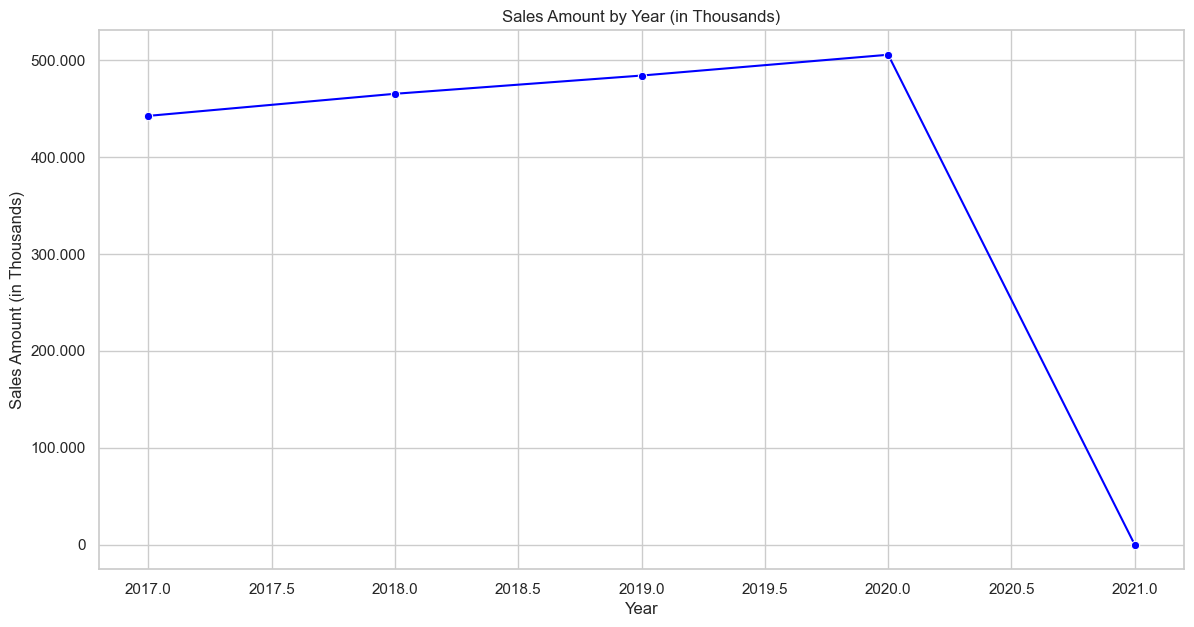

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker

file_path = r'C:\Users\perumalm\Desktop\GIT\MySQL server\GitHub_Copliot_demo\Excelfiles\Git_copilot_POC_3.xlsx'

# Read the sheets from the Excel file
df_finance = pd.read_excel(file_path, sheet_name='FactFinance')

# Convert the 'Date' column to datetime format
df_finance['Date'] = pd.to_datetime(df_finance['Date'])

# Extract the year from the 'Date' column
df_finance['Year'] = df_finance['Date'].dt.year

# Aggregate sales amount by year
yearly_sales = df_finance.groupby('Year')['Sales Amount, actual'].sum().reset_index()

# Convert sales amount to thousands
yearly_sales['Sales Amount, actual'] = yearly_sales['Sales Amount, actual'] / 1000

# Set the style
sns.set(style="whitegrid")

# Create a line plot for sales amount vs year
plt.figure(figsize=(14, 7))
sns.lineplot(x='Year', y='Sales Amount, actual', data=yearly_sales, marker='o', color='blue')
plt.title('Sales Amount by Year (in Thousands)')
plt.xlabel('Year')
plt.ylabel('Sales Amount (in Thousands)')

# Format the y-axis labels to German unit standard
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'.replace(',', '.')))

plt.grid(True)
plt.show()

C:\Users\perumalm\AppData\Local\Temp\ipykernel_14688\2509303035.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='ProductGroup', data=df_product, palette='viridis', ax=axes[1, 1])
C:\Users\perumalm\AppData\Local\Temp\ipykernel_14688\2509303035.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(), rotation=45)
C:\Users\perumalm\AppData\Local\Temp\ipykernel_14688\2509303035.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2, 1].set_xticklabels(axes[2, 1].get_xticklabels(), rotation=45)
C:\Users\perumalm\AppData\Local\Temp\ipykernel_14688\2509303035.py:62: UserWarning: set_ticklabels() should only be use

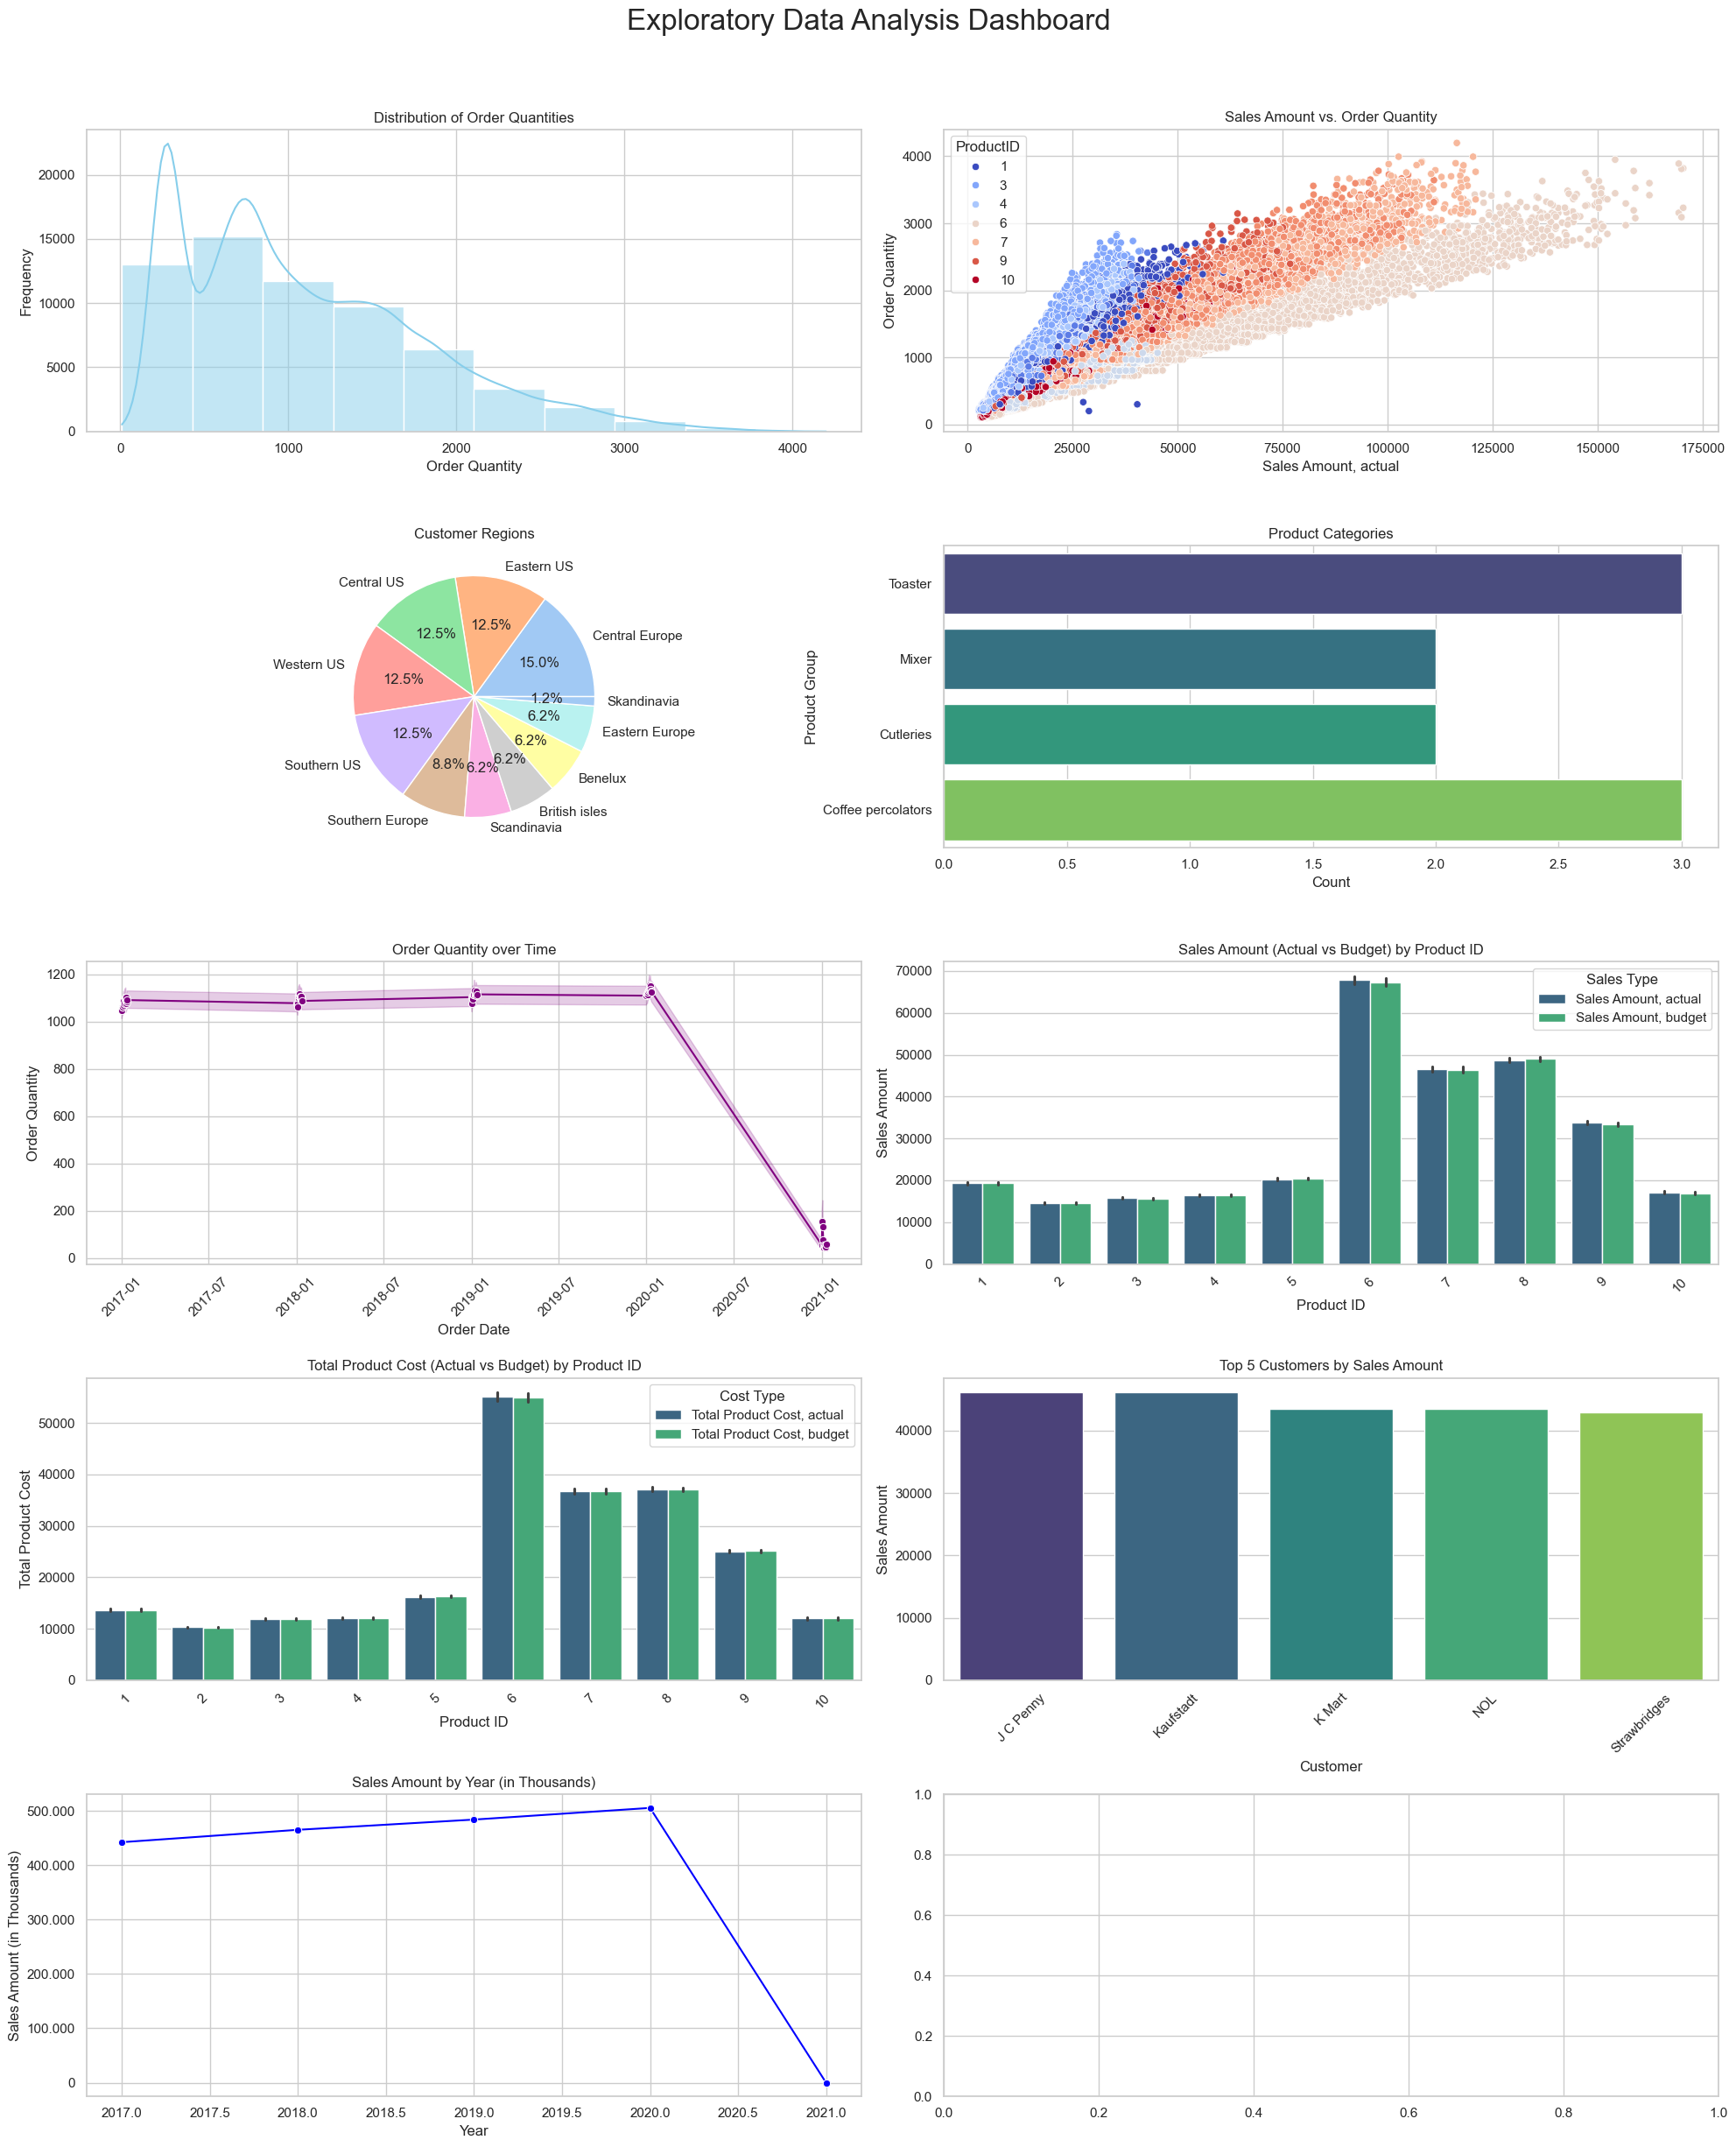

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a figure for the dashboard
fig, axes = plt.subplots(5, 2, figsize=(20, 25))
fig.suptitle('Exploratory Data Analysis Dashboard', fontsize=24)

# Chart 1: Histogram for OrderQuantity
sns.histplot(df_finance['OrderQuantity'], bins=10, kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Order Quantities')
axes[0, 0].set_xlabel('Order Quantity')
axes[0, 0].set_ylabel('Frequency')

# Chart 2: Scatter plot for Sales Amount, actual vs. OrderQuantity
sns.scatterplot(x='Sales Amount, actual', y='OrderQuantity', data=df_finance, hue='ProductID', palette='coolwarm', ax=axes[0, 1])
axes[0, 1].set_title('Sales Amount vs. Order Quantity')
axes[0, 1].set_xlabel('Sales Amount, actual')
axes[0, 1].set_ylabel('Order Quantity')

# Chart 3: Pie chart for Customer Regions
df_customer['Region'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'), ax=axes[1, 0])
axes[1, 0].set_title('Customer Regions')
axes[1, 0].set_ylabel('')

# Chart 4: Bar plot for Product Categories
sns.countplot(y='ProductGroup', data=df_product, palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Product Categories')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('Product Group')

# Chart 5: Line plot for OrderQuantity over Time
sns.lineplot(x='Date', y='OrderQuantity', data=df_finance, marker='o', color='purple', ax=axes[2, 0])
axes[2, 0].set_title('Order Quantity over Time')
axes[2, 0].set_xlabel('Order Date')
axes[2, 0].set_ylabel('Order Quantity')
axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(), rotation=45)

# Chart 6: Bar plot for 'Sales Amount, actual' and 'Sales Amount, budget' vs 'ProductID'
df_finance_melted = df_finance.melt(id_vars='ProductID', value_vars=['Sales Amount, actual', 'Sales Amount, budget'],
                                    var_name='Sales Type', value_name='Sales Amount')
sns.barplot(x='ProductID', y='Sales Amount', hue='Sales Type', data=df_finance_melted, palette='viridis', ax=axes[2, 1])
axes[2, 1].set_title('Sales Amount (Actual vs Budget) by Product ID')
axes[2, 1].set_xlabel('Product ID')
axes[2, 1].set_ylabel('Sales Amount')
axes[2, 1].set_xticklabels(axes[2, 1].get_xticklabels(), rotation=45)
axes[2, 1].legend(title='Sales Type')

# Chart 7: Bar plot for 'Total Product Cost, actual' and 'Total Product Cost, budget' vs 'ProductID'
df_finance_melted = df_finance.melt(id_vars='ProductID', value_vars=['Total Product Cost, actual', 'Total Product Cost, budget'],
                                    var_name='Cost Type', value_name='Total Product Cost')
sns.barplot(x='ProductID', y='Total Product Cost', hue='Cost Type', data=df_finance_melted, palette='viridis', ax=axes[3, 0])
axes[3, 0].set_title('Total Product Cost (Actual vs Budget) by Product ID')
axes[3, 0].set_xlabel('Product ID')
axes[3, 0].set_ylabel('Total Product Cost')
axes[3, 0].set_xticklabels(axes[3, 0].get_xticklabels(), rotation=45)
axes[3, 0].legend(title='Cost Type')

# Chart 8: Bar plot for top 5 customers by sales amount
sns.barplot(x='Customer', y='Sales Amount, actual', data=top_5_customers, palette='viridis', ax=axes[3, 1])
axes[3, 1].set_title('Top 5 Customers by Sales Amount')
axes[3, 1].set_xlabel('Customer')
axes[3, 1].set_ylabel('Sales Amount')
axes[3, 1].set_xticklabels(axes[3, 1].get_xticklabels(), rotation=45)

# Chart 9: Line plot for sales amount vs year
sns.lineplot(x='Year', y='Sales Amount, actual', data=yearly_sales, marker='o', color='blue', ax=axes[4, 0])
axes[4, 0].set_title('Sales Amount by Year (in Thousands)')
axes[4, 0].set_xlabel('Year')
axes[4, 0].set_ylabel('Sales Amount (in Thousands)')
axes[4, 0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'.replace(',', '.')))
axes[4, 0].grid(True)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()